In [19]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat
import pickle


from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier

## Load settings

In [20]:
grid = None
k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA
taskname = "task6"
db_set = "datasets/ECGITtrain.mat"
filedir = "/home/fredrik/Documents/Learning_systems/Labs/Project/"
#filedir = "C:/Users/fredr/Documents/github-projects/Learning_systems/Labs/Project/"

scoring='accuracy' # Scoring method for GridsearchCV
score_function = f_classif # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [21]:
plot_feature_relationship# Define models that should be trained
estimators = [
    ('clf', 'passthrough'),
]
param_grid = [
    {
        'clf':[LinearSVC()],
        'clf__penalty':['l1','l2'],
        'clf__C': [0.1,0.5,1,1.5,2.0],
        'clf__dual':[True,False]
    },{
        'clf':[SVC()],
        'clf__C':[1,0.5,1,5.2],
        'clf__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__degree':[1,2,3],
        'clf__gamma':['scale', 'auto'],
        'clf__max_iter':[1000,5000,10000],
    },{
        'clf':[RandomForestClassifier()],
        'clf__n_estimators':[100,150,200],
    },{
        'clf':[KNeighborsClassifier()],
        'clf__n_neighbors':[5,3,6,8],
        'clf__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'clf__leaf_size':[30,15,20,40]
    },{
        'clf':[MLPClassifier()],
        'clf__hidden_layer_sizes':[(100,20)],
        'clf__activation':['relu', 'tanh', 'logistic'],
        'clf__solver':['adam', 'lbfgs'],
        'clf__alpha':[0.0001,0.001,0.1],
        'clf__max_iter':[200,400],
        'clf__early_stopping':[True, False]
    }
]

# Task 6 - Classification 

## Load dataset

In [22]:
mat = loadmat(db_set)
input_train = mat['inputECGITtrain']

target_train = mat['outputECGITtrain'].reshape(len(input_train))
input_test = mat['inputECGITtest']

## Data info

In [23]:
get_data_info(input_train, target_train)

Length of 200
X.shape: (200, 312) y.shape: (200,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False


## Preprocess
Normalize the dataset

In [24]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

Length of input: 200


## Feature distribution

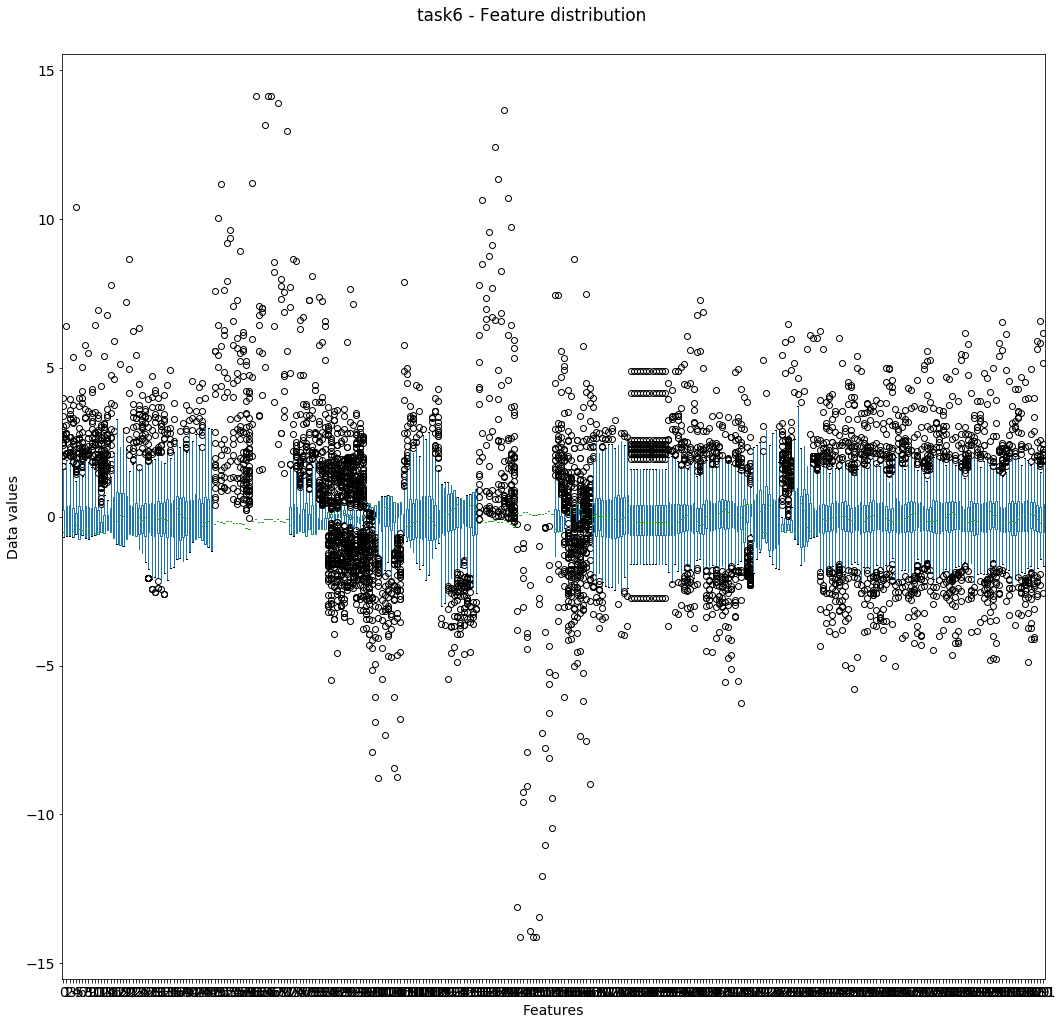

In [25]:
plot_feature_distribution(input_train, filedir=filedir, taskname=taskname)

## Feature reduction
Reduce dimensionality by PCA transform

In [26]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (200, 312)
transformed shape: (200, 68)
Explained variance: [0.13689165 0.10947223 0.08835791 0.05714188 0.03852058 0.03348119
 0.02998714 0.02927492 0.02559136 0.02323128 0.02056029 0.01891973
 0.01810861 0.01627311 0.01578273 0.01518965 0.01288996 0.01232019
 0.01165783 0.01106354 0.01025566 0.01020286 0.00963132 0.00899118
 0.00888426 0.00835079 0.00780978 0.00768602 0.00738474 0.00729493
 0.00691865 0.00648512 0.0063632  0.00611334 0.0060643  0.00559347
 0.00536385 0.00515121 0.00511318 0.00485909 0.00444808 0.00431979
 0.00426217 0.0040189  0.00380549 0.00361753 0.00353812 0.00350734
 0.00327855 0.00316379 0.00309998 0.00306435 0.00289113 0.00285685
 0.00281515 0.00262383 0.00255781 0.00252214 0.00235482 0.00228139
 0.00223909 0.00213703 0.00210408 0.00206141 0.00195353 0.00191249
 0.00182698 0.00179275]


## Feature extraction

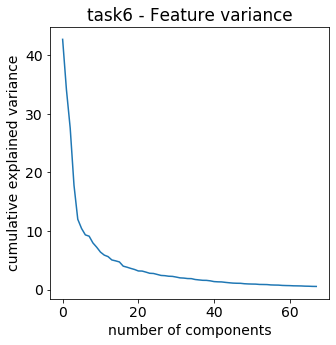

In [27]:
plot_feature_variance(pca_input, filedir=filedir, taskname=taskname)

## Feature selection
Extract top features above depending on PCA

[  5  17  38  75 101 121 158 165 168 194 195 196 197 200 201 202 203 208
 212 213 214 215 219 224 225 226 227 243 244 248 249 250 251 255 256 257
 260 261 262 263 267 268 269 272 273 274 275 279 280 281 284 285 286 287
 291 292 293 296 297 298 299 303 304 305 308 309 310 311]
Shape of input: (200, 312)


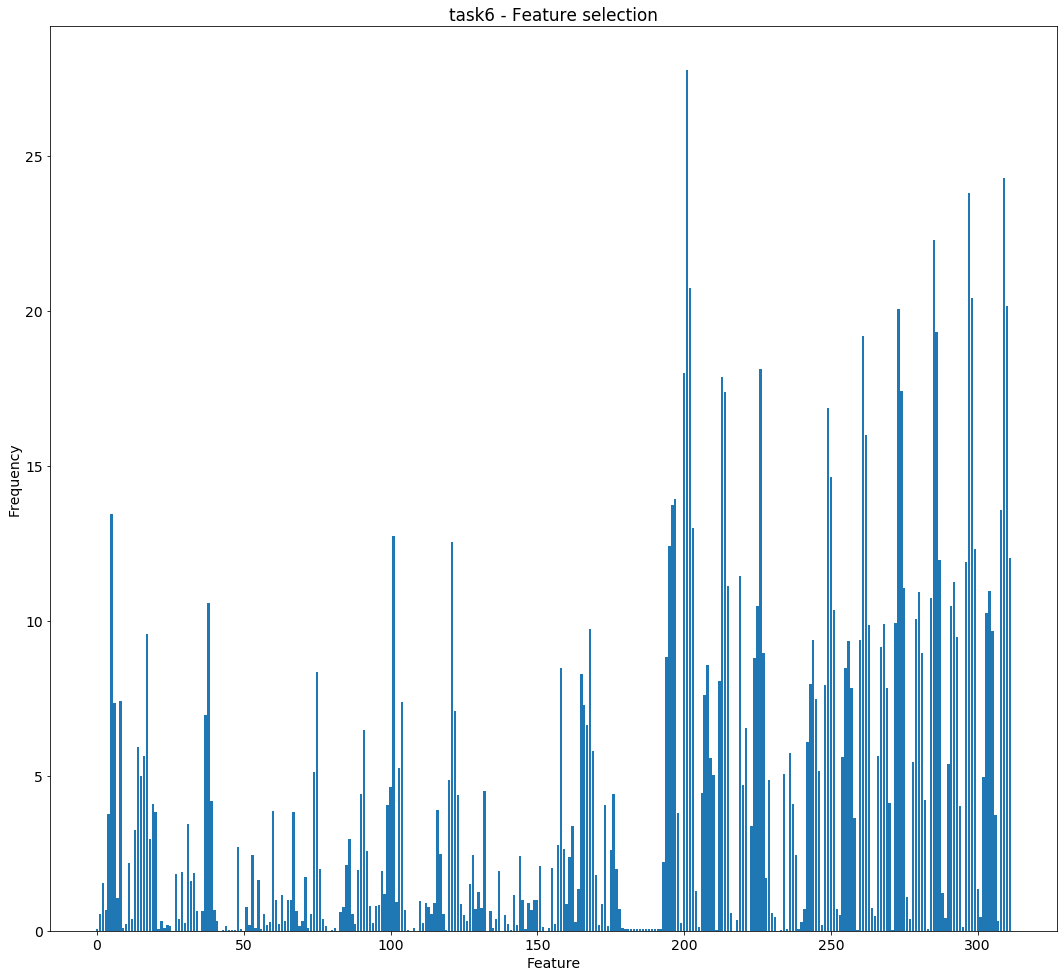

In [28]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, filedir=filedir, taskname=taskname,feature_tot=feature_tot)

## Feature Relationship

x-axis contain features and y is frequency of values


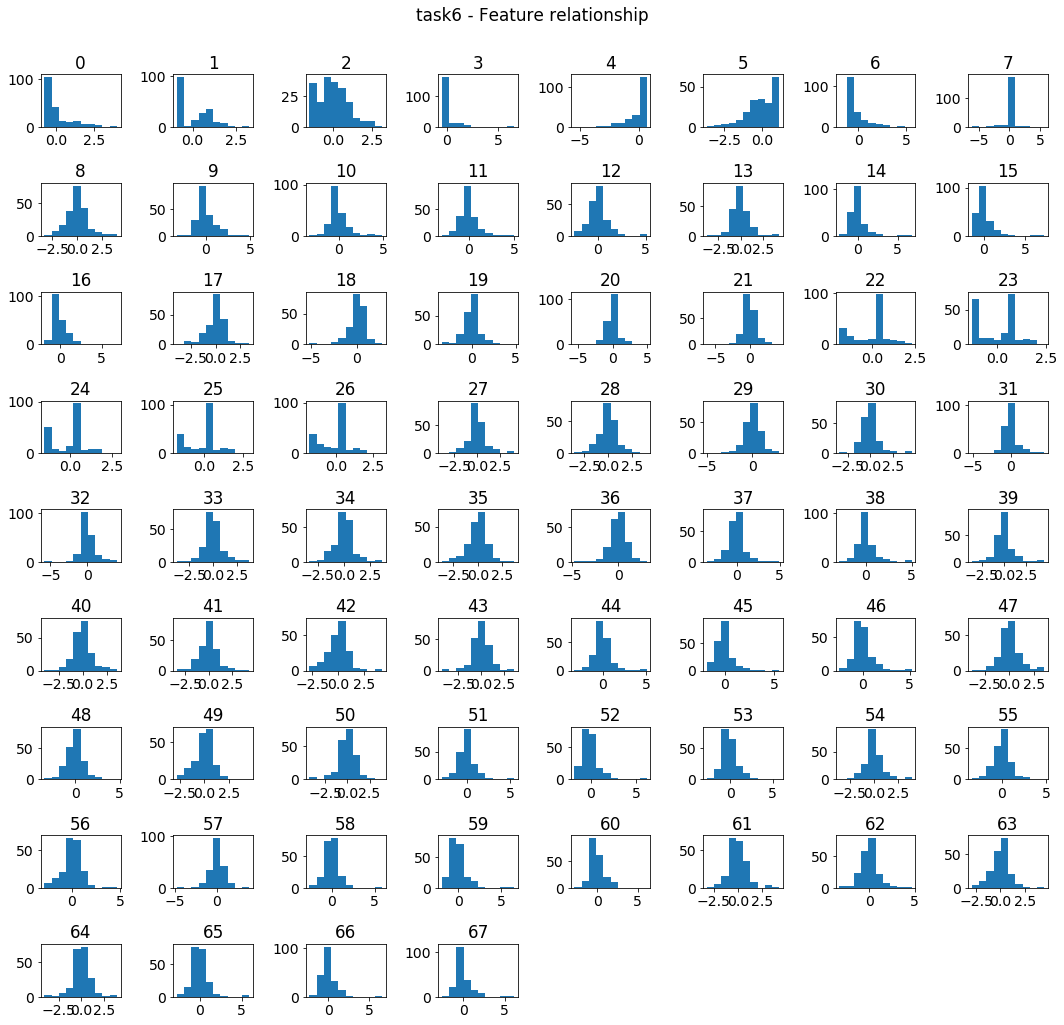

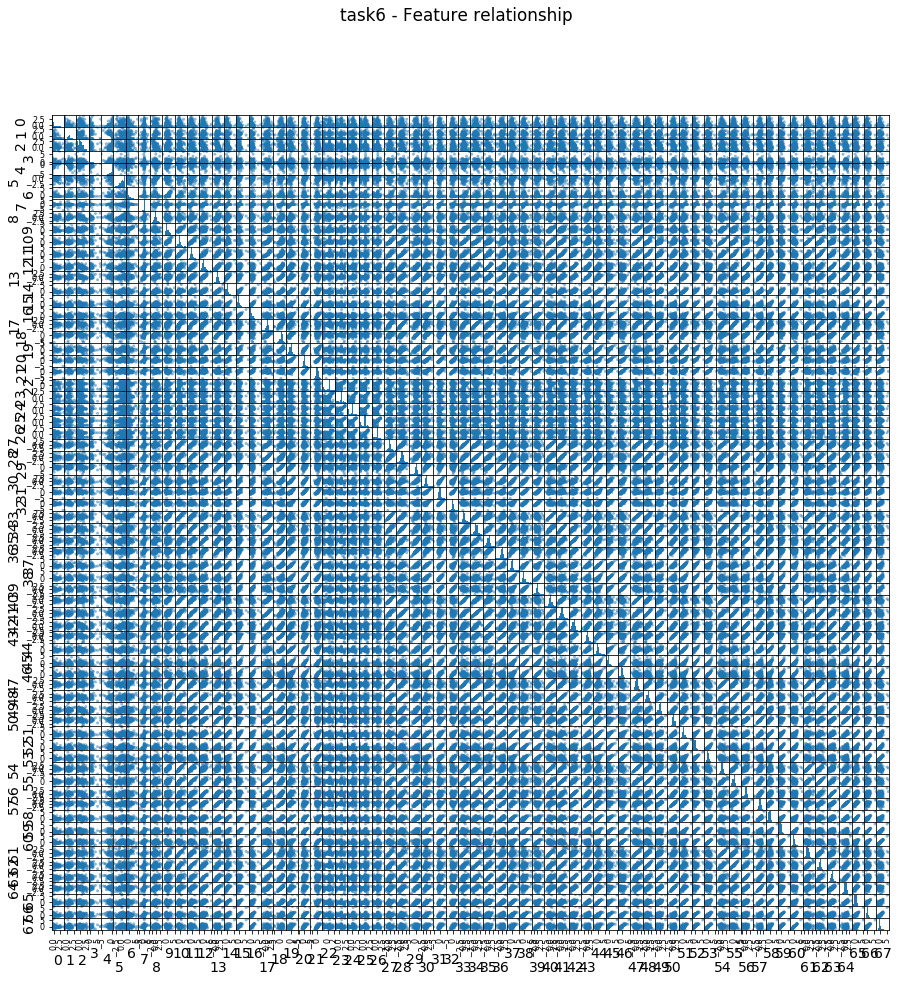

In [29]:
plot_feature_relationship(input_train_fs, filedir, taskname)

## Hyperparameter tuning

In [32]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, input_train_fs, target_train, scoring=scoring, k=k)


Fitting 10 folds for each of 447 candidates, totalling 4470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 3830 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4380 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4470 out of 4470 | elapsed: 13.3min finished


## Save model

In [33]:
save_model(grid, filedir=filedir, taskname=taskname)

Save model into: /home/fredrik/Documents/Learning_systems/Labs/Project/Models/task6.joblib


## Load model

In [30]:
if not grid: 
    grid = load_model(filedir=filedir, taskname=taskname)

Loading model:  /home/fredrik/Documents/Learning_systems/Labs/Project/Models/task6.joblib


## Get Model info

In [31]:
get_model_info(grid)

     mean_test_score  std_test_score  rank_test_score  \
360              0.8        0.074162                1   
328              0.8        0.074162                1   
336              0.8        0.074162                1   
324              0.8        0.074162                1   
320              0.8        0.074162                1   

                                                                                                                                                                                                                                                                              params  
360      {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'), 'clf__algorithm': 'brute', 'clf__leaf_size': 30, 'clf__n_neighbors': 3}  
328  {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             

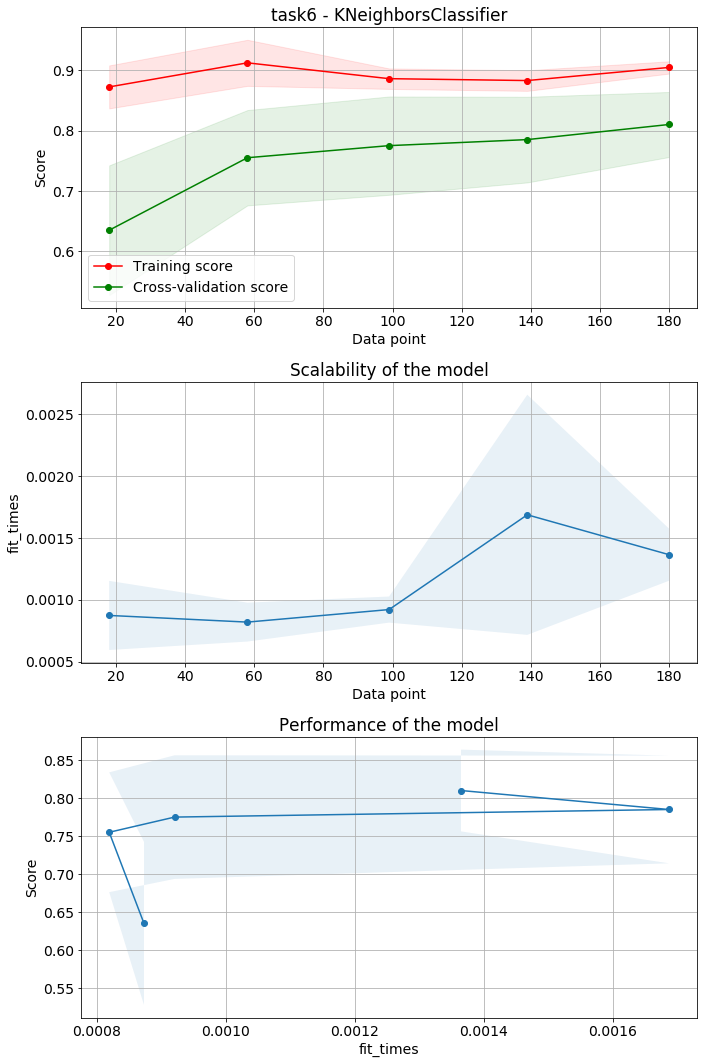

In [32]:
validate_curve(grid, input_train_fs, target_train, filedir=filedir, taskname=taskname,scoring=scoring, k=k)

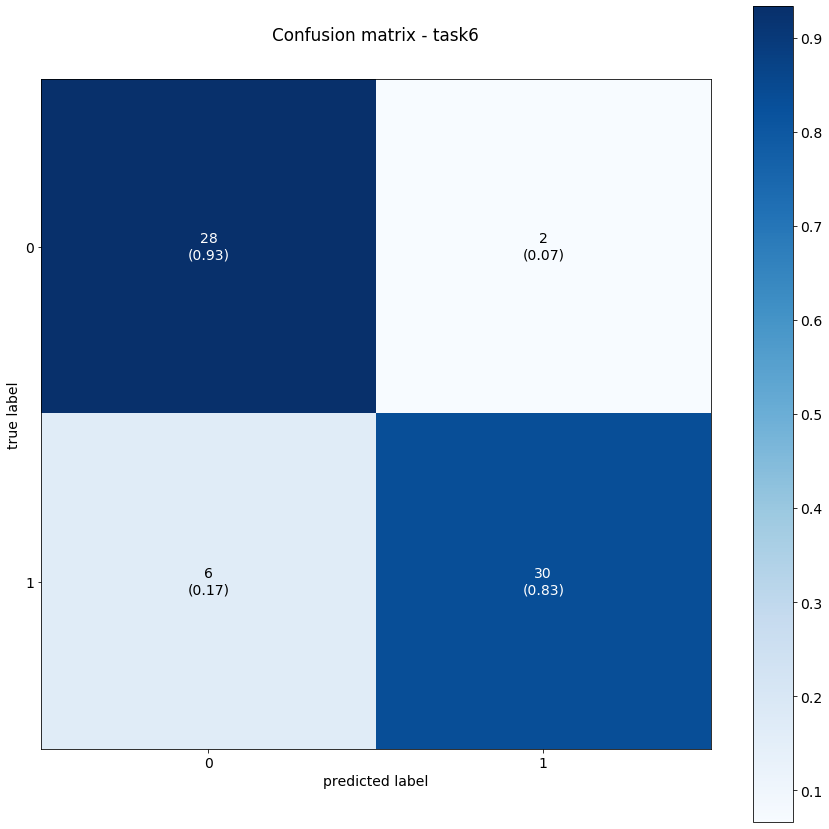

In [33]:
display_confusion_matrix(grid, input_train_fs, target_train, filedir=filedir, taskname=taskname)

# Predict testset

In [34]:
_,predict = predict_model(grid, input_train_fs, target_train, input_test_fs)
save_prediction(predict, filedir, taskname)
print(predict)

[0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0]
